In [1]:
.libPaths("/home//amazigh.mokhtari//NeuroDev_ADD/R/r_3.6.0/")

In [2]:
library (dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
### import the data 
omics = readRDS ("00_Data/MDD_Male_DNAm_No_preserv.RDS")
num_factors = 10 

In [4]:
#### Import the Results : 
MCIA_dry   = readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/01_factorizations_mcia_dry.RDS")
MOFA_dry   = readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/02_MOFAobject_trained_dry.RDS")
JIVE_dry   = readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/03_factorizations_jive_dry.RDS")
INTNMF_dry = readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/04_factorizations_intnmf_dry.RDS")
SCKIT_dry  = readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/05_factorizations_scikit_dry.RDS")
RGCCA_dry  = readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/06_factorizations_SGCCA_dry.RDS")

In [6]:
factors_MCIA = readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/factors_mcia.RDS")
factors_MOFA =  readRDS ("02_Results/01_MDD_Male_DNAm_No_preserv/factors_mofa.RDS")

In [7]:
## Extraact Components 
compo_mcia = lapply(  MCIA_dry$coa , function (x) {  df = x$co ; colnames(df) = paste0("MCIA_Comp_" , 1:10) ; df } )
saveRDS (compo_mcia , file= "02_Results/01_MDD_Male_DNAm_No_preserv/compo_mcia.RDS" )

In [8]:
### Extract Jive Results 
rankJV   = JIVE_dry$rankJ
rankIV.v = JIVE_dry$rankA   

J  = numeric(0)
ng = 0

factors_jive = features_w_jive = list()
 
for(j in 1:length(omics [1:3])){
    
    J  = rbind(J,JIVE_dry$joint[[j]]);
    ng = c(ng,dim(JIVE_dry$joint[[j]])[1])
  }

svd.o = svd(J);
jV    = svd.o$v %*% diag(svd.o$d);

for(j in 1:length(omics[1:3])){
    features_w_jive[[j]]  =  svd.o$u[(1+sum(ng[1:j])):sum(ng[1:j+1]),1:rankJV]; ###error in dimension
    rownames(features_w_jive[[j]]) = rownames( t(omics[[j]]))
    colnames(features_w_jive[[j]]) = paste0("JIVE_" , 1:num_factors )
  }

factors_jive = jV[,1:rankJV]


colnames(factors_jive) = paste0("JIVE_" , 1:10 )
rownames(factors_jive) = rownames(omics$mRNA)
names (features_w_jive) = c("miRNA",  "mRNA" , "DNAm")


saveRDS(factors_jive , file = "02_Results/01_MDD_Male_DNAm_No_preserv/factors_jive.RDS" ) 
saveRDS(features_w_jive , file = "02_Results/01_MDD_Male_DNAm_No_preserv/features_w_jive.RDS" ) 

In [9]:
## Extraact Components JIVE

get_jiv_omic_comp = function (JIVE_dry , x) {
    svd_s = svd (JIVE_dry$joint[[x]])
    s_v = svd_s$v %*% diag(svd_s$d) 
    s = s_v [,1:10]
    colnames (s) = paste0("JIVE_Compo_" , 1:10) 
    rownames (s) = omics$covariates %>% rownames 
    return(s)
}

compo_jive = lapply (1:3 , function (x) {get_jiv_omic_comp (JIVE_dry , x )} ) 
names(compo_jive) = c("miRNA","mRNA","DNAm")
saveRDS (compo_jive , file= "02_Results/01_MDD_Male_DNAm_No_preserv/compo_jive.RDS" )

In [10]:
### Extract intNMF Results 

factors_intnmf = INTNMF_dry$W
colnames(factors_intnmf) = paste0( "IntNMF_" , 1:10 )

features_w_intNMF =list()

for(j in 1:length(omics [1:3])){
    features_w_intNMF[[j]] = t(INTNMF_dry$H[[j]]) 
   # rownames(features_w_intNMF [[j]] ) = rownames(omics[[j]])
    colnames(features_w_intNMF [[j]] ) = paste0( "IntNMF_" , 1:10 )
  }
names (features_w_intNMF) = c("miRNA",  "mRNA" , "DNAm")

saveRDS(factors_intnmf    , file = "02_Results/01_MDD_Male_DNAm_No_preserv/factors_intnmf.RDS" ) 
saveRDS(features_w_intNMF , file = "02_Results/01_MDD_Male_DNAm_No_preserv/features_w_intNMF.RDS" ) 

In [11]:
# get intNMF compo

como_intNMF_miRNA = readRDS ('02_Results/01_MDD_Male_DNAm_No_preserv/comp_intNMFmiRNA.RDS')
como_intNMF_mRNA = readRDS ('02_Results/01_MDD_Male_DNAm_No_preserv/comp_intNMFmRNA.RDS')
como_intNMF_DNAm = readRDS ('02_Results/01_MDD_Male_DNAm_No_preserv/comp_intNMFDNAm.RDS')

como_intNMF = list ( miRNA = como_intNMF_miRNA$W , mRNA = como_intNMF_mRNA$W , DNAm = como_intNMF_DNAm$W ) 
compo_intNMF = lapply (como_intNMF , function (x) { colnames(x) = paste0("IntNMF_Compo_" , 1:10) ; x  })

In [12]:
### Extract sckit Results 

factors_sckit = SCKIT_dry[[1]]
features_w_sckit = SCKIT_dry[[2]]
colnames (factors_sckit) = paste0 ( "Scikit_", 1:10)
features_w_sckit = lapply(features_w_sckit , function (x) { colnames(x) =  paste0 ( "Scikit_", 1:10) ; x })
names (features_w_sckit) = c("miRNA",  "mRNA" , "DNAm")
saveRDS(factors_sckit , file = "02_Results/01_MDD_Male_DNAm_No_preserv/factors_sckit.RDS" ) 
saveRDS(features_w_sckit , file = "02_Results/01_MDD_Male_DNAm_No_preserv/features_w_sckit.RDS" ) 

In [13]:
## Get Scikit compo 

miRNA_sciki = read.csv2 (file = "00_Data/scikit_MDD/OUtput_test/miRNA_signals_.txt" , sep = "\t", header = F, stringsAsFactors = F)
mRNA_sciki = read.csv2 (file = "00_Data/scikit_MDD/OUtput_test/mRNA_signals_.txt" , sep = "\t", header = F , stringsAsFactors = F)
DNAm_sciki = read.csv2 (file = "00_Data/scikit_MDD/OUtput_test/DNAm_signals_.txt" , sep = "\t", header = F , stringsAsFactors = F)


compo_scikit = list(miRNA = miRNA_sciki, mRNA = mRNA_sciki, DNAm = DNAm_sciki)
compo_scikit = lapply (compo_scikit , function (x) { apply ( x , 2 , as.double) }   )
compo_scikit = lapply (compo_scikit , function(x) { colnames (x) = paste0 ("Scikit_Compo_" , 1:10) ; rownames (x) = rownames (omics$covariates) ; x } )

In [276]:
### Extract RGCCA Results 

factors_RGCCA = RGCCA_dry$Y$superblock
colnames (factors_RGCCA) = paste0 ( "RGCCA_", 1:10)
saveRDS(factors_RGCCA , file = "02_Results/01_MDD_Male_DNAm_No_preserv/factors_RGCCA.RDS" ) 

df_super_rgcca = as.data.frame(RGCCA_dry$a$superblock)
colnames(df_super_rgcca) = paste0("RGCCA_" , 1:10)
features_w_rgcca$miRNA =  df_super_rgcca [1:751 ,]
features_w_rgcca$mRNA =  df_super_rgcca [752:(752+14704) ,]
features_w_rgcca$DNAm =  df_super_rgcca [(752+14704+1):(nrow(df_super_rgcca)) ,]

saveRDS(features_w_rgcca , file = "02_Results/01_MDD_Male_DNAm_No_preserv/features_w_rgcca.RDS" ) 

In [267]:
c(unlist(lapply(omics[1:3] , ncol)))

miRNA  mRNA  DNAm 
  751 14705 72450

In [150]:
features_w_rgcca_singleomic = RGCCA_dry$a [1:3]
features_w_rgcca_singleomic = lapply (features_w_rgcca_singleomic , function(x) {colnames (x) =  paste0("RGCCA_" , 1:10) ; x }  ) 
saveRDS(features_w_rgcca_singleomic , file = "02_Results/01_MDD_Male_DNAm_No_preserv/features_w_rgcca_singleomic.RDS" ) 

In [139]:
### get RGCCA Compo 

compo_rgcca = RGCCA_dry$Y [1:3]
featu = lapply (compo_rgcca , function (x) { colnames(x) = paste0("RGCCA_Compo_" , 1:10) ; x  })

In [16]:
## get MCIA features 
features_w_mcia = lapply (MCIA_dry$coa , function (x) { df = x$li ; colnames(df) = paste0("MCIA_" , 1:10) ; df  })
saveRDS(features_w_mcia , file = "02_Results/01_MDD_Male_DNAm_No_preserv/features_w_mcia.RDS" ) 

In [17]:
# get MCIA compo 
compo_mcia = lapply (MCIA_dry$coa , function (x) { df = x$c1 ; colnames(df) = paste0("MCIA_Compo_" , 1:10) ; df } )


In [18]:
## get MOFA  features 
library (MOFA2)
features_w_mofa = get_weights (MOFA_dry)
features_w_mofa = lapply (features_w_mofa , function(x) {colnames (x) = paste0 ("MOFA_" , 1:10) ; x } )
saveRDS(features_w_mofa , file = "02_Results/01_MDD_Male_DNAm_No_preserv/features_w_mofa.RDS" ) 


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




In [216]:
factors_mofa = get_factors (MOFA_dry) $group1 
colnames (factors_mofa) = paste0("MOFA_" , 1:10)

In [19]:
## get MOFA compo 
compo_mofa = MOFA_dry@expectations$W
compo_mofa = lapply (compo_mofa , function (x) {colnames(x) = paste0("MOFA_Compo" , 1:10) ; x } )



In [20]:
Group =   as.double(as.factor(omics$covariates$Group))
all_facts = cbind(factors_intnmf,factors_jive,factors_MCIA,factors_MOFA,factors_sckit,factors_RGCCA , Group)

In [21]:

library(corrplot)

cor.mtest = function(mat, ...) {
    mat = as.matrix(mat)
    n = ncol(mat)
    p.mat = matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp = cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] = p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) = rownames(p.mat) <- colnames(mat)
  p.mat
}

M = cor(all_facts)

p.mat = cor.mtest(all_facts)



corrplot 0.84 loaded



In [22]:
### get the ranking of the feature based on the most correlated feature to the phenotype

## get best corr to phenotype 

cor_fact_pheno = function (compo) {
    
    p_val_cor = cor.mtest (compo)
    pval_group = p_val_cor [ 1:nrow(p_val_cor)-1, ncol(p_val_cor)] 
    
    name_fact_ = names(which.min(pval_group [ pval_group < 0.05]))
    if (length(name_fact_) != 0 ) {
        return (gsub ( "_Compo_" , "_", name_fact_ ) )
    }
    
}


### Calculate an optimal ranikng based on the diffetent ones 


In [23]:

#### Get the best factors by omics and method 

compos = list(compo_intNMF = compo_intNMF,
              compo_rgcca  = compo_rgcca,
              compo_jive   = compo_jive,
              compo_mcia   = compo_mcia,
              compo_scikit = compo_scikit)

compos_best =   lapply (compos , function (Y) { lapply ( Y , function (x) { cor_fact_pheno ( cbind (x , Group) )  } ) } )

### Result correlated according to the case control status

compos_best

### Result correlated according to the HDRS score 


compos_best_HDRS =   lapply (compos , function (Y) { lapply ( Y , function (x) { cor_fact_pheno ( cbind (x , omics$covariates$HDRS_total ) )  } ) } )



compos_best_HDRS

$compo_intNMF
$compo_intNMF$miRNA
[1] "IntNMF_3"

$compo_intNMF$mRNA
[1] "IntNMF_10"

$compo_intNMF$DNAm
[1] "IntNMF_2"


$compo_rgcca
$compo_rgcca$miRNA
[1] "RGCCA_6"

$compo_rgcca$mRNA
[1] "RGCCA_6"

$compo_rgcca$DNAm
[1] "RGCCA_5"


$compo_jive
$compo_jive$miRNA
[1] "JIVE_6"

$compo_jive$mRNA
[1] "JIVE_6"

$compo_jive$DNAm
[1] "JIVE_2"


$compo_mcia
$compo_mcia$miRNA
[1] "MCIA_6"

$compo_mcia$mRNA
[1] "MCIA_1"

$compo_mcia$DNAm
NULL


$compo_scikit
$compo_scikit$miRNA
NULL

$compo_scikit$mRNA
[1] "Scikit_3"

$compo_scikit$DNAm
NULL

$compo_intNMF
$compo_intNMF$miRNA
[1] "IntNMF_3"

$compo_intNMF$mRNA
[1] "IntNMF_10"

$compo_intNMF$DNAm
[1] "IntNMF_2"


$compo_rgcca
$compo_rgcca$miRNA
[1] "RGCCA_6"

$compo_rgcca$mRNA
[1] "RGCCA_5"

$compo_rgcca$DNAm
NULL


$compo_jive
$compo_jive$miRNA
[1] "JIVE_6"

$compo_jive$mRNA
[1] "JIVE_1"

$compo_jive$DNAm
NULL


$compo_mcia
$compo_mcia$miRNA
[1] "MCIA_6"

$compo_mcia$mRNA
[1] "MCIA_1"

$compo_mcia$DNAm
NULL


$compo_scikit
$compo_scikit$miRNA
NULL

$compo_scikit$mRNA
NULL

$compo_scikit$DNAm
NULL

In [ ]:
### get the omics featurs by method




In [45]:
compos_best

$compo_intNMF
$compo_intNMF$miRNA
[1] "IntNMF_3"

$compo_intNMF$mRNA
[1] "IntNMF_10"

$compo_intNMF$DNAm
[1] "IntNMF_2"


$compo_rgcca
$compo_rgcca$miRNA
[1] "RGCCA_6"

$compo_rgcca$mRNA
[1] "RGCCA_6"

$compo_rgcca$DNAm
[1] "RGCCA_5"


$compo_jive
$compo_jive$miRNA
[1] "JIVE_6"

$compo_jive$mRNA
[1] "JIVE_6"

$compo_jive$DNAm
[1] "JIVE_2"


$compo_mcia
$compo_mcia$miRNA
[1] "MCIA_6"

$compo_mcia$mRNA
[1] "MCIA_1"

$compo_mcia$DNAm
NULL


$compo_scikit
$compo_scikit$miRNA
NULL

$compo_scikit$mRNA
[1] "Scikit_3"

$compo_scikit$DNAm
NULL

In [162]:
gen_omic_n = function (features_w , best_fact , o , omics , frac = 0.01) {
    
    if ( !is.null (best_fact) ) { # get row names of the omic
        feat_n =  features_w[[ o ]]     %>% 
                    as.data.frame                          %>% 
                    arrange ( - abs( . [ , best_fact ]))  %>% 
                    top_frac (  frac )                     %>% 
                    row.names

        return( omics [[ o] ] [ , feat_n ]  )}
}



In [164]:
fracts = list (miRNA = 0.01 , mRNA = 0.1 , DNAm =  0.1)
om = list (miRNA =  "miRNA" , mRNA =  "mRNA" , DNAm = "DNAm")

data_intNMF = mapply ( function (x , y) {  gen_omic_n (features_w_intNMF , compos_best$compo_intNMF [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_rgcca = mapply (  function (x , y) {  gen_omic_n (features_w_rgcca_singleomic , compos_best$compo_rgcca [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_jive = mapply (   function (x , y) {  gen_omic_n (features_w_jive , compos_best$compo_jive [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_mcia = mapply (   function (x , y) {  gen_omic_n (features_w_mcia , compos_best$compo_mcia [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_scikit = mapply ( function (x , y) {  gen_omic_n (features_w_sckit , compos_best$compo_scikit [[x]] , x , omics = omics , frac = y )}  , om , fracts  )



Selecting by IntNMF_10

Selecting by IntNMF_10

Selecting by IntNMF_10

Selecting by RGCCA_10

Selecting by RGCCA_10

Selecting by RGCCA_10

Selecting by JIVE_10

Selecting by JIVE_10

Selecting by JIVE_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by Scikit_10



In [194]:
data_sing_omic = list (intNMF = data_intNMF , rgcca = data_rgcca , jive = data_jive , mcia = data_mcia ) # , scikit = data_scikit)


In [198]:
SNF_all  = lapply (  data_sing_omic , function(x) { SNF_f ( lapply ( plyr::compact (x) , t)  , names = c( names (plyr::compact (x))  , "All"  ))  } )
NEMO_all = lapply (  data_sing_omic , function(x) { nemo_f ( lapply ( plyr::compact (x) , t)  , names = c( names (plyr::compact (x))  , "All"  ))  } )

In [24]:
#### Get the best factors on the combined omics 

features = list (features_w_intNMF,
                 features_w_jive ,
                 features_w_mcia ,
                 features_w_mofa ,
                 features_w_rgcca ,
                 features_w_sckit)


features_miRNA = lapply ( features , function (x)  {x$miRNA} )
features_mRNA  = lapply ( features , function (x)  {x$mRNA} )
features_DNAm  = lapply ( features , function (x)  {x$DNAm} )

In [25]:
best_miRNA  = lapply (compos_best , function (x) { x$miRNA } ) 
best_mRNA  = lapply (compos_best , function (x) { x$mRNA } ) 
best_DNAm  = lapply (compos_best , function (x) { x$DNAm } ) 

In [223]:
#### Get the best factors on the combined omics 


feat_all = list(fact_intNMF = factors_intnmf,
              fact_rgcca  = factors_RGCCA,
              fact_jive   = factors_jive,
              fact_mcia   = factors_MCIA,
              fact_mofa   = factors_MOFA,
              fact_scikit = factors_sckit)



In [224]:
feat_all_best =  lapply ( feat_all ,  function (x) { cor_fact_pheno ( cbind (x , Group) )  }  )

In [172]:
### Aggregate the list 

In [28]:
miRNA_w = do.call ( "cbind" , features_miRNA  ) [ ,unlist(best_miRNA)]

for (col_n in colnames (miRNA_w)) {
    
    miRNA_w [ , col_n ] = rownames( miRNA_w [ order ( - abs(miRNA_w [ , col_n ] ) ) ,] )
}



In [31]:
aggr = RankAggreg::RankAggreg (t(miRNA_w), 10, seed=100, rho=.01 ,verbose=FALSE)

In [32]:
miRNA_w = do.call ( "cbind" , features_miRNA  ) [ ,unlist(best_miRNA)]


In [33]:
 miRNA_o = apply ( miRNA_w , 2  , function (x) {order ( abs(x) , decreasing =  T) }  )
rownames (miRNA_o) = rownames (miRNA_w)
write.csv (miRNA_o , file = "miRNA_o.csv", quote = FALSE  )

In [34]:
mRNA_w = do.call ( "cbind" , features_mRNA  ) [ ,unlist(best_mRNA)]


for (col_n in colnames (mRNA_w)) {
    
    mRNA_w [ , col_n ] = rownames( mRNA_w [ order ( - abs(mRNA_w [ , col_n ] ) ) ,] )
}


In [104]:
saveRDS (mRNA_w , "mRNA_w.RDS")

In [322]:
agg_best_mRNAs = readRDS ("agg_best_mRNAs.RDS")

In [37]:
### function aggreg lists of rankings 

library (TopKLists)
aggreg_list = function ( features_data , best_data) {
    
    data_w = do.call ( "cbind" , features_data  ) [ ,unlist(best_data)]

    for (col_n in colnames (data_w)) {

        data_w [ , col_n ] = rownames( data_w [ order ( - abs(data_w [ , col_n ] ) ) ,] )
    }
    
    allO        = rownames(data_w) 
    space_list = list ()

    for ( i in 1:ncol(mRNA_w) ) {

        space_list = append(space_list , list(allO) )
    }
    
    outBorda    = Borda (as.list ( data_w ) , space = space_list )

    return (outBorda )
}

In [38]:
outBorda_miRNA = aggreg_list (features_miRNA , best_miRNA )
outBorda_mRNA  = aggreg_list (features_mRNA  , best_mRNA )
outBorda_DNAm  = aggreg_list (features_DNAm  , best_DNAm )

In [326]:
#### Compare Cross entropy motecarlo and Geo mean results 

 agg_best_mRNAs

[1] "ENSG00000247627" "ENSG00000256618" "ENSG00000225630" "ENSG00000122877"
  [5] "ENSG00000197766" "ENSG00000213058" "ENSG00000181126" "ENSG00000120738"
  [9] "ENSG00000248527" "ENSG00000279192" "ENSG00000225972" "ENSG00000185736"
 [13] "ENSG00000259207" "ENSG00000102837" "ENSG00000248905" "ENSG00000228078"
 [17] "ENSG00000197969" "ENSG00000109452" "ENSG00000229314" "ENSG00000033867"
 [21] "ENSG00000175265" "ENSG00000030419" "ENSG00000237973" "ENSG00000051523"
 [25] "ENSG00000005249" "ENSG00000118113" "ENSG00000198744" "ENSG00000186676"
 [29] "ENSG00000185697" "ENSG00000137145" "ENSG00000237550" "ENSG00000101162"
 [33] "ENSG00000170074" "ENSG00000198786" "ENSG00000049323" "ENSG00000096006"
 [37] "ENSG00000255733" "ENSG00000144426" "ENSG00000123689" "ENSG00000233411"
 [41] "ENSG00000059691" "ENSG00000221869" "ENSG00000162722" "ENSG00000069667"
 [45] "ENSG00000065534" "ENSG00000118058" "ENSG00000101425" "ENSG00000096696"
 [49] "ENSG00000173208" "ENSG00000168497" "ENSG00000100985" "ENSG00000078177"
 [53] "ENSG00000103490" "ENSG00000274213" "ENSG00000055609" "ENSG00000005483"
 [57] "ENSG00000112159" "ENSG00000170296" "ENSG00000240463" "ENSG00000234742"
 [61] "ENSG00000236438" "ENSG00000000971" "ENSG00000115268" "ENSG00000235532"
 [65] "ENSG00000179388" "ENSG00000010256" "ENSG00000018510" "ENSG00000145390"
 [69] "ENSG00000156162" "ENSG00000163736" "ENSG00000099624" "ENSG00000187800"
 [73] "ENSG00000127603" "ENSG00000274173" "ENSG00000280128" "ENSG00000134352"
 [77] "ENSG00000104918" "ENSG00000064932" "ENSG00000118922" "ENSG00000010803"
 [81] "ENSG00000012817" "ENSG00000197530" "ENSG00000116791" "ENSG00000008838"
 [85] "ENSG00000157827" "ENSG00000233614" "ENSG00000237541" "ENSG00000130881"
 [89] "ENSG00000065268" "ENSG00000270550" "ENSG00000183762" "ENSG00000257151"
 [93] "ENSG00000120137" "ENSG00000036448" "ENSG00000064393" "ENSG00000166925"
 [97] "ENSG00000046651" "ENSG00000065802" "ENSG00000138772" "ENSG00000132704"

In [327]:
outBorda_mRNA$TopK

,mean,median,geo.mean,l2norm
,<chr>,<chr>,<chr>,<chr>
1,ENSG00000030419,ENSG00000247627,ENSG00000247627,ENSG00000030419
2,ENSG00000196914,ENSG00000256618,ENSG00000030419,ENSG00000196914
3,ENSG00000144426,ENSG00000225972,ENSG00000256618,ENSG00000197603
4,ENSG00000197603,ENSG00000030419,ENSG00000225630,ENSG00000005810
5,ENSG00000156265,ENSG00000120738,ENSG00000248527,ENSG00000144426
6,ENSG00000276085,ENSG00000033867,ENSG00000120738,ENSG00000156265
7,ENSG00000005810,ENSG00000069667,ENSG00000122877,ENSG00000276085
8,ENSG00000054654,ENSG00000237973,ENSG00000225972,ENSG00000011405
9,ENSG00000005249,ENSG00000197969,ENSG00000237973,ENSG00000005249


In [328]:
outBorda_mRNA$TopK [outBorda_mRNA$TopK$geo.mean	 %in% agg_best_mRNAs , ] %>% rownames

[1] "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"    "10"  
 [11] "11"   "12"   "13"   "14"   "15"   "16"   "17"   "20"   "22"   "25"  
 [21] "27"   "29"   "30"   "31"   "36"   "39"   "44"   "45"   "47"   "48"  
 [31] "49"   "56"   "59"   "60"   "62"   "63"   "64"   "68"   "70"   "75"  
 [41] "78"   "79"   "81"   "85"   "87"   "91"   "92"   "94"   "95"   "99"  
 [51] "110"  "111"  "112"  "117"  "129"  "144"  "146"  "171"  "177"  "188" 
 [61] "193"  "214"  "233"  "237"  "246"  "249"  "269"  "285"  "288"  "319" 
 [71] "382"  "443"  "456"  "464"  "482"  "495"  "498"  "539"  "657"  "697" 
 [81] "710"  "740"  "821"  "854"  "865"  "872"  "904"  "933"  "1020" "1131"
 [91] "1189" "1245" "1612" "1613" "1793" "2130" "2488" "2664" "2835" "3011"

In [ ]:
#### get the ARI of the clusturings 

In [40]:
libClustpackage = "00_ClusterMulti"
# SNF
library(SNFtool)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(DESeq2)
library(matrixStats)
library(mclust)
source(file.path (libClustpackage,'NEMO.R') )


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’

In [41]:
nemo_f = function (data, tl2 = tl , names = c("miRNA", "mRNA", "DNAm", "AllOmics")) 
{
    setClass(Class = "NemoRes", representation(graph = "matrix", 
        clustering = "integer"))
    nemo.clust = function(omics.list, num.clusters = NULL, num.neighbors = NA) {
        if (is.null(num.clusters)) {
            num.clusters = NA
        }
        graph = nemo.affinity.graph(omics.list, k = num.neighbors)
        if (is.na(num.clusters)) {
            num.clusters = nemo.num.clusters(graph)
        }
        clustering = spectralClustering(graph, num.clusters)
        names(clustering) = colnames(graph)
        return(new("NemoRes", graph = graph, clustering = clustering))
    }
    nemo.clust_momix = lapply(data, function(x) nemo.clust(list(x), 
        num.clusters = 2, num.neighbors = NA))
    nemo_all = nemo.clust(data, num.clusters = 2, num.neighbors = NA)
    nemo_group = do.call(cbind, lapply(nemo.clust_momix, function(x) {
        x@clustering
    })) %>% as.data.frame
    nemo_group$ALL = nemo_all@clustering
    nemo_group$TrueLabel = tl2
    ARIs_nemo = lapply(nemo_group[, 1:(ncol(nemo_group) - 1)], 
        function(x) adjustedRandIndex(x, nemo_group[, ncol(nemo_group)]))
    names(ARIs_nemo) = names
     return(list(ARIs = ARIs_nemo, Clusters = nemo_group))
}
                       

SNF_f = function (Data,
                K = 30 ,
                alpha = 0.6 ,
                T = 50  ,
                C = 2  ,
                tl2 = tl , 
                color = c("#ffe935","#e289bf"),
                names = c("miRNA", "mRNA", "DNAm", "AllOmics")) {
    
    
    Dist.MOMIX_metaG = lapply ( lapply(Data  , t) , function (x) {(dist2((as.matrix(x)),as.matrix(x)))^(1/2)})
    W.MOMIX_metaG    = lapply (Dist.MOMIX_metaG , function (x) {affinityMatrix(x, K, alpha)})
    W_all_MOMIX_metaG           = SNF(W.MOMIX_metaG, K, T)
    group_mom             = lapply(  W.MOMIX_metaG   , function(x) {spectralClustering(x,C)} )
    group_mom             = append (group_mom , list(factALL = spectralClustering ( W_all_MOMIX_metaG  , C) ) )
    
    # get the True clusturing 
    levels(tl2)  = c(1,2)
    ##### Get Clusters 
    M_label_ = t(do.call(rbind, group_mom)) %>% as.data.frame
    M_label_$TrueLabel = tl2
    rownames(M_label_) = rownames(W.MOMIX_metaG[[1]])
    
    ARIs = lapply (  M_label_ [ , 1: (ncol(M_label_)-1 )]  , function(x) adjustedRandIndex(x , M_label_[ ,ncol(M_label_)]))
    names (ARIs) = names 
    return(  list(ARIs = ARIs ,
             Clusters = M_label_ ))
}

In [229]:
# get lists of best features 

omics_best_features = list (     miRNA = omics$miRNA [ , outBorda_miRNA_all$TopK$geo.mean [1:10] ] %>% as.data.frame ,
                                  mRNA =  omics$mRNA [ , outBorda_mRNA_all$TopK$geo.mean [1:1500] ]  %>% as.data.frame,
                                  DNAm = omics$DNAm  [ , outBorda_DNAm_all$TopK$geo.mean [1:3200] ]  %>% as.data.frame

)

In [317]:
SNF_f  ( lapply ( omics_best_features , t)  , names = c( names (omics_best_features)  , "All"  ))

,miRNA,mRNA,DNAm,factALL,TrueLabel
,<int>,<int>,<int>,<int>,<int>
PCLZ117,1,1,1,1,2
PCLZ118,2,1,2,1,2
PCLZ119,2,1,1,1,2
PCLZ121,2,2,1,2,2
PCLZ122,2,2,2,2,2
PCLZ123,2,1,1,1,2
PCLZ124,1,1,2,1,2
PCLZ126,2,1,2,1,2
PCLZ127,2,1,1,1,2


In [318]:
nemo_f  ( lapply ( omics_best_features , t)  , names = c( names (omics_best_features)  , "All"  ))

,miRNA,mRNA,DNAm,ALL,TrueLabel
,<int>,<int>,<int>,<int>,<int>
PCLZ117,1,1,1,1,2
PCLZ118,2,1,1,1,2
PCLZ119,2,1,1,1,2
PCLZ121,2,2,1,2,2
PCLZ122,2,2,1,2,2
PCLZ123,2,1,1,2,2
PCLZ124,1,1,2,1,2
PCLZ126,2,1,1,1,2
PCLZ127,2,1,2,1,2


In [43]:
tl =  omics$covariates$Group %>% as.factor %>% as.integer

In [212]:
lapply ( SNF_all  , function (x) {x$ARIs} ) 
lapply ( NEMO_all , function (x) {x$ARIs} ) 

$intNMF
$intNMF$miRNA
[1] 0.001975959

$intNMF$mRNA
[1] -0.016498

$intNMF$DNAm
[1] -0.01762989

$intNMF$All
[1] -0.01737966


$rgcca
$rgcca$miRNA
[1] 0.08031134

$rgcca$mRNA
[1] -0.00385397

$rgcca$DNAm
[1] -0.016498

$rgcca$All
[1] 0.1033725


$jive
$jive$miRNA
[1] -0.006878981

$jive$mRNA
[1] 0.1288767

$jive$DNAm
[1] -0.01775505

$jive$All
[1] -0.006878981


$mcia
$mcia$miRNA
[1] -0.006817064

$mcia$mRNA
[1] 0.06004281

$mcia$All
[1] -0.01599817

$intNMF
$intNMF$miRNA
[1] -0.005333333

$intNMF$mRNA
[1] -0.015

$intNMF$DNAm
[1] -0.01167007

$intNMF$All
[1] 0.03117335


$rgcca
$rgcca$miRNA
[1] -0.00844917

$rgcca$mRNA
[1] 0.08481362

$rgcca$DNAm
[1] 0.05969599

$rgcca$All
[1] -0.01215306


$jive
$jive$miRNA
[1] -0.006631358

$jive$mRNA
[1] 0.01635557

$jive$DNAm
[1] -0.01650481

$jive$All
[1] 0.01635557


$mcia
$mcia$miRNA
[1] -0.01216742

$mcia$mRNA
[1] -0.01254075

$mcia$All
[1] 0.04627946

In [288]:
## all the features 

features_w = list (w_intNMF = features_w_intNMF,
    w_jive  = features_w_jive,
    w_mcia  = features_w_mcia,
    w_sckit = features_w_sckit,
    w_rgcca = features_w_rgcca,
    w_mofa  =features_w_mofa)

In [262]:
feat_all_best

$fact_intNMF
NULL

$fact_rgcca
[1] "RGCCA_5"

$fact_jive
[1] "JIVE_1"

$fact_mcia
[1] "MCIA_7"

$fact_mofa
[1] "MOFA_1"

$fact_scikit
NULL

In [164]:
fracts = list (miRNA = 0.01 , mRNA = 0.1 , DNAm =  0.1)
om = list (miRNA =  "miRNA" , mRNA =  "mRNA" , DNAm = "DNAm")

data_intNMF = mapply ( function (x , y) {  gen_omic_n (features_w_intNMF , compos_best$compo_intNMF [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_rgcca = mapply (  function (x , y) {  gen_omic_n (features_w_rgcca_singleomic , compos_best$compo_rgcca [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_jive = mapply (   function (x , y) {  gen_omic_n (features_w_jive , compos_best$compo_jive [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_mcia = mapply (   function (x , y) {  gen_omic_n (features_w_mcia , compos_best$compo_mcia [[x]] , x , omics = omics , frac = y )}  , om , fracts  )
data_scikit = mapply ( function (x , y) {  gen_omic_n (features_w_sckit , compos_best$compo_scikit [[x]] , x , omics = omics , frac = y )}  , om , fracts  )



Selecting by IntNMF_10

Selecting by IntNMF_10

Selecting by IntNMF_10

Selecting by RGCCA_10

Selecting by RGCCA_10

Selecting by RGCCA_10

Selecting by JIVE_10

Selecting by JIVE_10

Selecting by JIVE_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by Scikit_10



In [194]:
data_sing_omic = list (intNMF = data_intNMF , rgcca = data_rgcca , jive = data_jive , mcia = data_mcia ) # , scikit = data_scikit)


In [303]:
feat_all_best

$fact_intNMF
NULL

$fact_rgcca
[1] "RGCCA_5"

$fact_jive
[1] "JIVE_1"

$fact_mcia
[1] "MCIA_7"

$fact_mofa
[1] "MOFA_1"

$fact_scikit
NULL

In [305]:
fracts = list (miRNA = 0.01 , mRNA = 0.1 , DNAm =  0.1)
om = list (miRNA =  "miRNA" , mRNA =  "mRNA" , DNAm = "DNAm")

data_all_mofa = mapply ( function (x , y) {  gen_omic_n (features_w$w_mofa ,  feat_all_best$fact_mofa , x , omics = omics , frac = y )}  , om , fracts  )
data_all_rgcca = mapply ( function (x , y) {  gen_omic_n (features_w$w_rgcca ,  feat_all_best$fact_rgcca , x , omics = omics , frac = y )}  , om , fracts  )
data_all_mcia = mapply ( function (x , y) {  gen_omic_n (features_w$w_mcia ,  feat_all_best$fact_mcia , x , omics = omics , frac = y )}  , om , fracts  )
data_all_jive = mapply ( function (x , y) {  gen_omic_n (features_w$w_jive ,  feat_all_best$fact_jive , x , omics = omics , frac = y )}  , om , fracts  )


data_al = list (data_all_mofa = data_all_mofa , data_all_rgcca = data_all_rgcca , data_all_mcia = data_all_mcia , data_all_jive = data_all_jive ) 

Selecting by MOFA_10

Selecting by MOFA_10

Selecting by MOFA_10

Selecting by RGCCA_10

Selecting by RGCCA_10

Selecting by RGCCA_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by MCIA_10

Selecting by JIVE_10

Selecting by JIVE_10

Selecting by JIVE_10



In [309]:
SNF_data_al  = lapply (  data_al , function(x) { SNF_f  ( lapply ( plyr::compact (x) , t)  , names = c( names (plyr::compact (x))  , "All"  ))  } )
Nemo_data_al = lapply (  data_al , function(x) { nemo_f ( lapply ( plyr::compact (x) , t)  , names = c( names (plyr::compact (x))  , "All"  ))  } )


In [311]:
lapply ( SNF_data_al  , function (x) {x$ARIs} ) 
lapply ( Nemo_data_al , function (x) {x$ARIs} ) 

$data_all_mofa
$data_all_mofa$miRNA
[1] 0.01272694

$data_all_mofa$mRNA
[1] 0.00234394

$data_all_mofa$DNAm
[1] -0.01762989

$data_all_mofa$All
[1] -0.006322001


$data_all_rgcca
$data_all_rgcca$miRNA
[1] 0.001975959

$data_all_rgcca$mRNA
[1] 0.04176438

$data_all_rgcca$DNAm
[1] -0.01631051

$data_all_rgcca$All
[1] 0.02652954


$data_all_mcia
$data_all_mcia$miRNA
[1] -0.006817064

$data_all_mcia$mRNA
[1] 0.06004281

$data_all_mcia$DNAm
[1] -0.016498

$data_all_mcia$All
[1] -0.01631051


$data_all_jive
$data_all_jive$miRNA
[1] -0.006878981

$data_all_jive$mRNA
[1] 0.1288767

$data_all_jive$DNAm
[1] -0.01775505

$data_all_jive$All
[1] -0.006878981

$data_all_mofa
$data_all_mofa$miRNA
[1] -0.01513309

$data_all_mofa$mRNA
[1] 0.04738703

$data_all_mofa$DNAm
[1] -0.006817064

$data_all_mofa$All
[1] -0.01431489


$data_all_rgcca
$data_all_rgcca$miRNA
[1] 0.014

$data_all_rgcca$mRNA
[1] -0.01556123

$data_all_rgcca$DNAm
[1] 0.001730488

$data_all_rgcca$All
[1] 0.01635557


$data_all_mcia
$data_all_mcia$miRNA
[1] -0.01216742

$data_all_mcia$mRNA
[1] -0.01254075

$data_all_mcia$DNAm
[1] 0.003446257

$data_all_mcia$All
[1] -0.01215306


$data_all_jive
$data_all_jive$miRNA
[1] -0.006631358

$data_all_jive$mRNA
[1] 0.01635557

$data_all_jive$DNAm
[1] -0.01650481

$data_all_jive$All
[1] 0.01635557

In [314]:
(lapply ( SNF_data_al  , function (x) {x$ARIs} ) )


$data_all_mofa
$data_all_mofa$miRNA
[1] 0.01272694

$data_all_mofa$mRNA
[1] 0.00234394

$data_all_mofa$DNAm
[1] -0.01762989

$data_all_mofa$All
[1] -0.006322001


$data_all_rgcca
$data_all_rgcca$miRNA
[1] 0.001975959

$data_all_rgcca$mRNA
[1] 0.04176438

$data_all_rgcca$DNAm
[1] -0.01631051

$data_all_rgcca$All
[1] 0.02652954


$data_all_mcia
$data_all_mcia$miRNA
[1] -0.006817064

$data_all_mcia$mRNA
[1] 0.06004281

$data_all_mcia$DNAm
[1] -0.016498

$data_all_mcia$All
[1] -0.01631051


$data_all_jive
$data_all_jive$miRNA
[1] -0.006878981

$data_all_jive$mRNA
[1] 0.1288767

$data_all_jive$DNAm
[1] -0.01775505

$data_all_jive$All
[1] -0.006878981

In [242]:
library(annotables)
library(IlluminaHumanMethylationEPICanno.ilm10b5.hg38)
### Filter based on region 
## Get 850k Annotation on hg38 
Annot850k = as.data.frame(getAnnotation(IlluminaHumanMethylationEPICanno.ilm10b5.hg38))


In [249]:
library (missMethyl)

In [267]:
res = gometh(outBorda_DNAm$TopK$geo.mean [1:5000] , outBorda_DNAm_all$TopK$geo.mean ,  collection = "kegg", plot.bias = FALSE, prior.prob = TRUE)

In [269]:
res %>% filter (P.DE < 0.05)

,Description,N,DE,P.DE,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
path:hsa00280,"Valine, leucine and isoleucine degradation",27,7.0000,0.036007412,1
path:hsa00561,Glycerolipid metabolism,31,8.0000,0.039516975,1
path:hsa00564,Glycerophospholipid metabolism,48,13.0000,0.007009984,1
path:hsa00900,Terpenoid backbone biosynthesis,11,4.0000,0.026796134,1
path:hsa00982,Drug metabolism - cytochrome P450,25,6.0000,0.039346874,1
path:hsa00983,Drug metabolism - other enzymes,38,10.0000,0.005427850,1
path:hsa01100,Metabolic pathways,719,108.6667,0.010917975,1
path:hsa04072,Phospholipase D signaling pathway,91,20.5000,0.026066950,1
path:hsa04710,Circadian rhythm,18,6.0000,0.031502739,1


In [243]:
outBorda_DNAm_all

In [99]:
mRNA_w = do.call ( "cbind" , features_mRNA  ) [ ,unlist(best_mRNA)]

mRNA_o = apply ( mRNA_w , 2  , function (x) {order ( abs(x) , decreasing =  T) }  )
rownames (mRNA_o) = rownames (mRNA_w)
write.csv (mRNA_o , file = "mRNA_o.csv", quote = FALSE  )

In [100]:
DNAm_w = do.call ( "cbind" , features_DNAm  ) [ ,unlist(best_DNAm)]


for (col_n in colnames (DNAm_w)) {
    
    DNAm_w [ , col_n ] = rownames( DNAm_w [ order ( - abs(DNAm_w [ , col_n ] ) ) ,] )
}
DNA_agg = RankAggreg::RankAggreg (t(DNAm_w), 600 , seed=100, rho=.01 ,verbose=FALSE) ; saveRDS (DNA_agg , "DNA_agg.RDS")

In [102]:
saveRDS (DNAm_w , "DNAm_w.RDS")

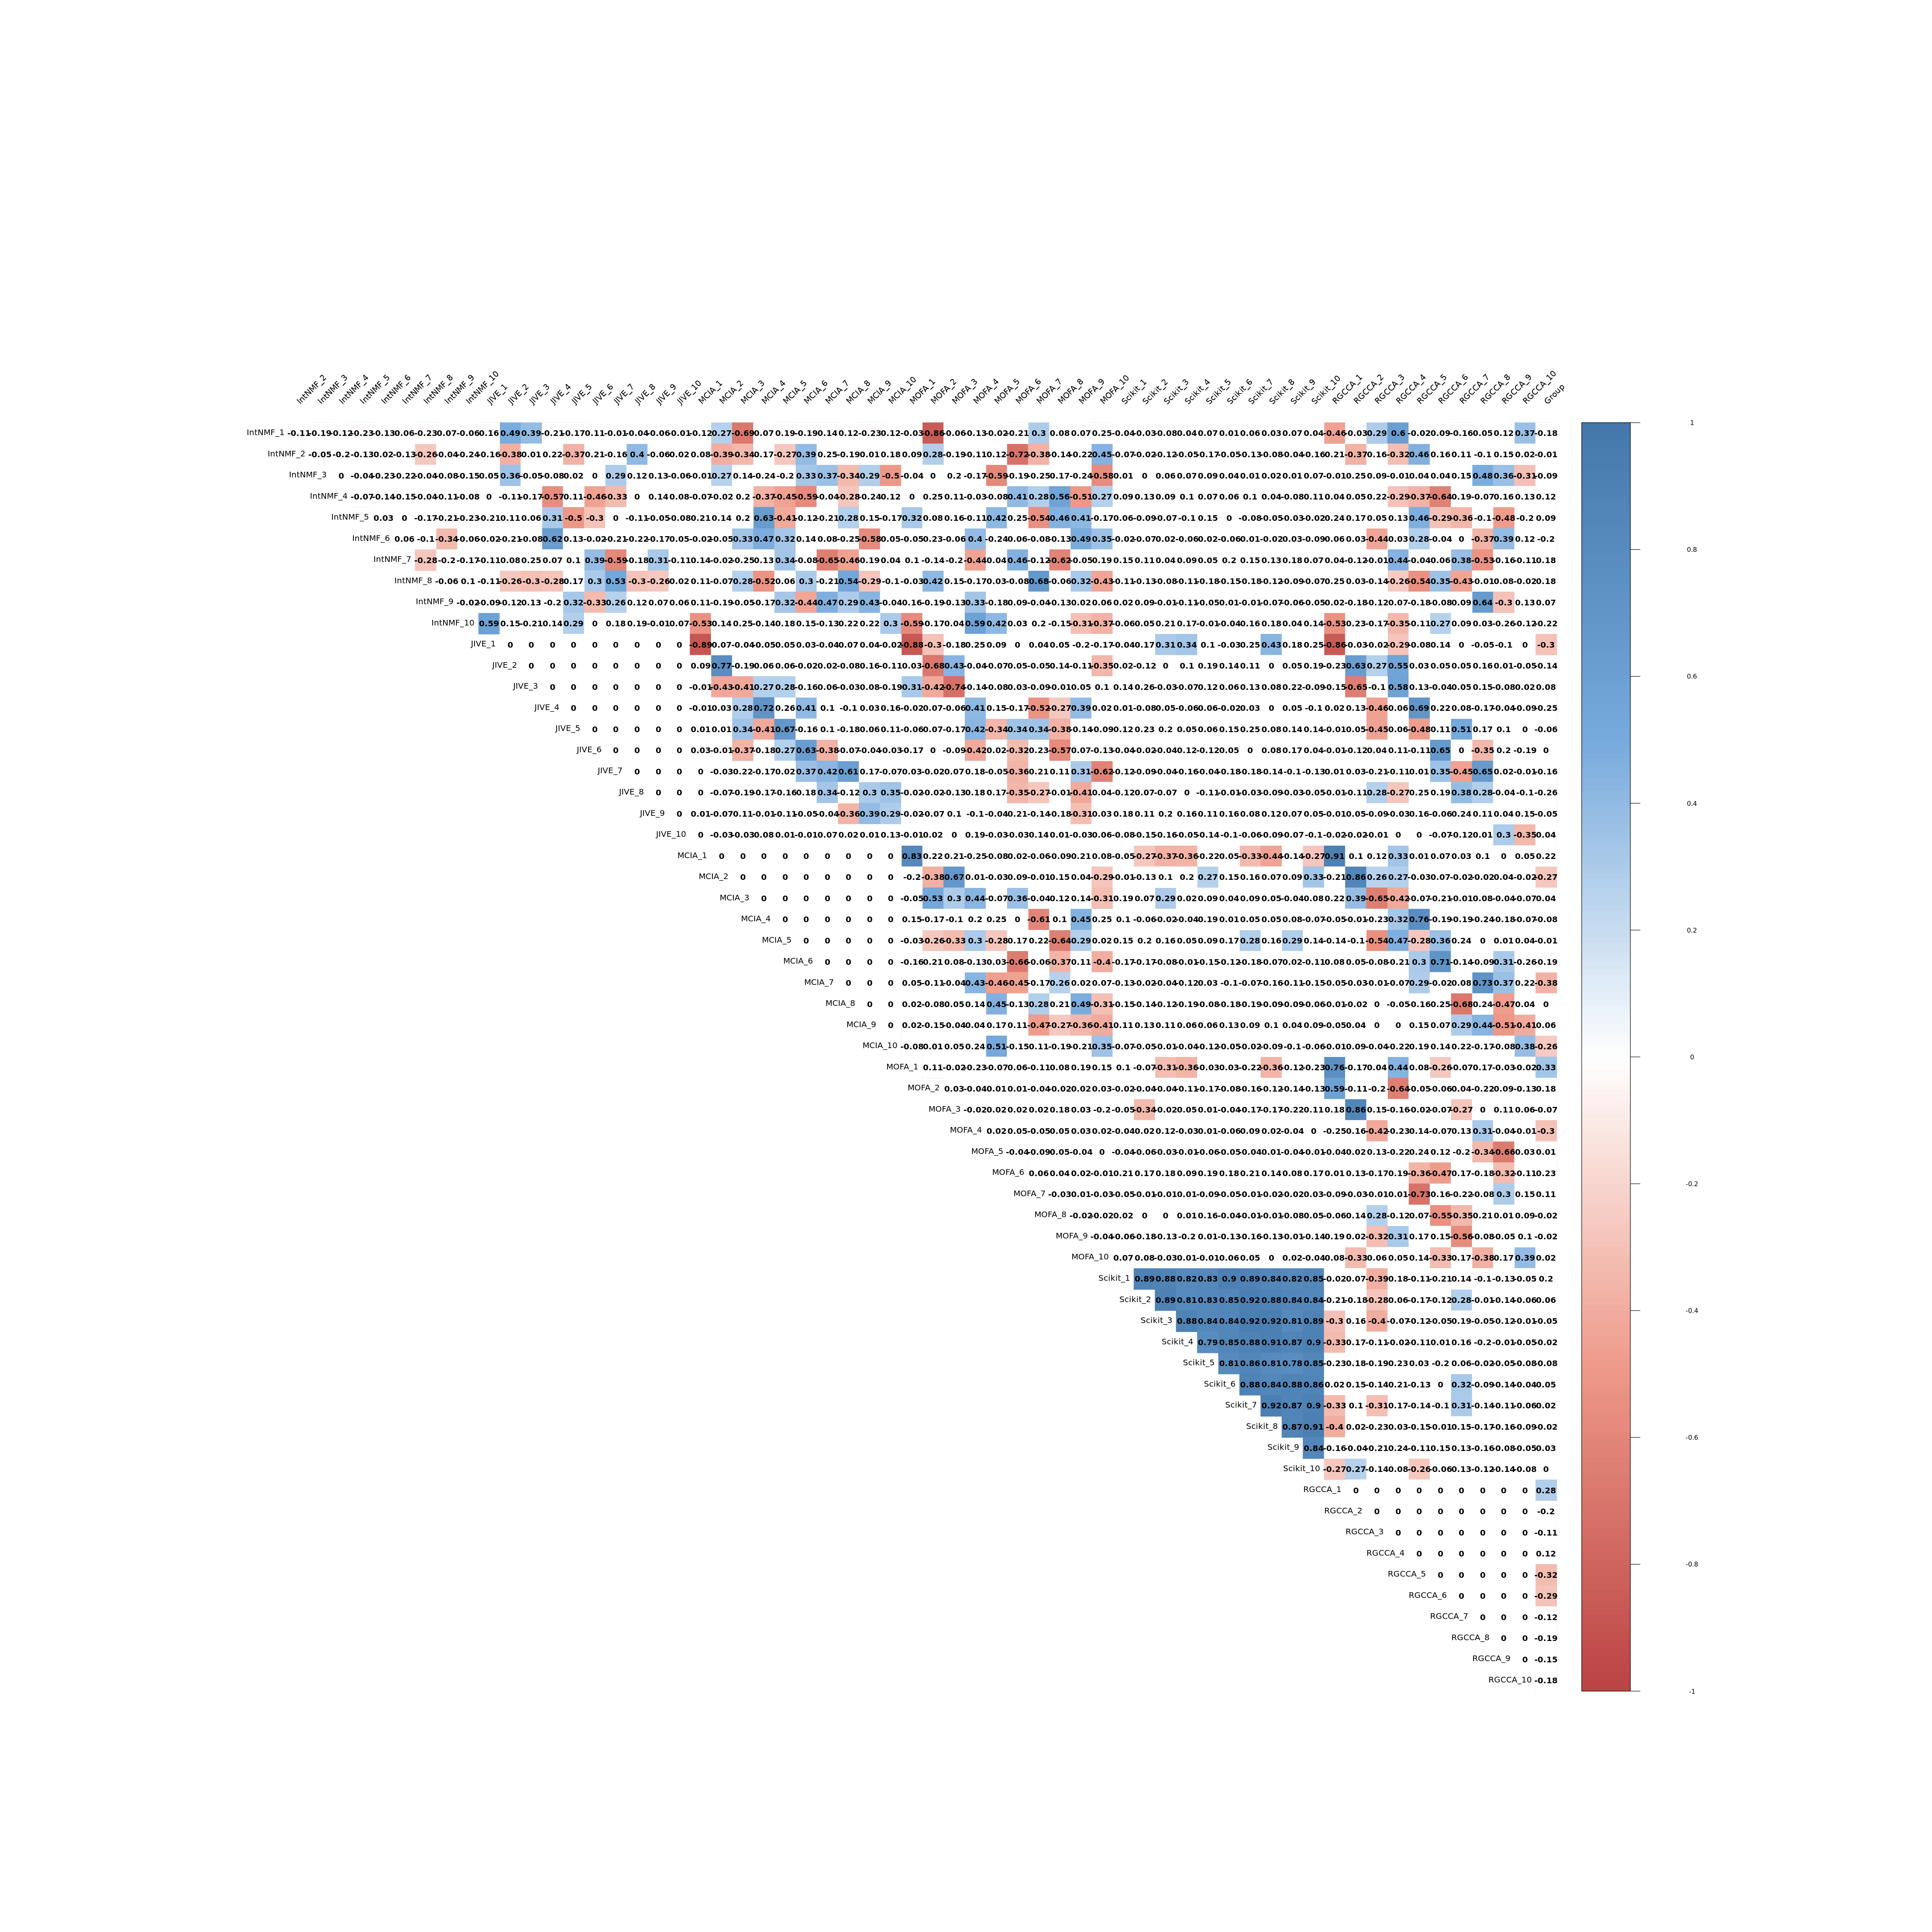

In [52]:
options(repr.plot.width=40, repr.plot.height=40)

col = colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(M, method="color", col=col(200),  
         type="upper", 
         addCoef.col = "black", # Ajout du coefficient de corrélation
         tl.col="black", tl.srt=45, #Rotation des etiquettes de textes
         # Combiner avec le niveau de significativité
         p.mat = p.mat, sig.level = 0.05, insig = "blank", 
         # Cacher les coefficients de corrélation sur la diagonale
         diag=FALSE 
         )

In [53]:
p.mat[, "Group"]  [p.mat[, "Group"] < 0.05] %>% names

[1] "JIVE_1"  "MCIA_2"  "MCIA_7"  "MCIA_10" "MOFA_1"  "MOFA_4"  "RGCCA_1"
 [8] "RGCCA_5" "RGCCA_6" "Group"

In [58]:
features_w_rgcca$miRNA

,RGCCA_1,RGCCA_2,RGCCA_3,RGCCA_4,RGCCA_5,RGCCA_6,RGCCA_7,RGCCA_8,RGCCA_9,RGCCA_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-196a-5p,-0.002179777,0.0058956935,-2.015334e-03,-0.0478346734,-0.0041577076,-4.932872e-05,0.008871365,-0.0077516460,-0.0168094688,0.048473642
hsa-miR-320c,-0.006605342,0.0034379478,-1.170429e-02,0.0006571929,0.0152560032,-1.452116e-04,-0.009866240,0.0160865748,0.0329951121,-0.020596007
hsa-miR-3074-5p,-0.020781189,-0.0291683633,-4.803149e-03,-0.0150405550,0.0263063258,1.740238e-04,-0.003520694,-0.0059233448,0.0365021620,-0.018332048
hsa-miR-30c-5p,-0.010405598,0.0031236564,1.351874e-02,-0.0351898130,0.0142121602,-1.858336e-04,-0.006499129,-0.0325661719,-0.0317462522,0.005893428
hsa-miR-3620-5p,-0.007256677,-0.0065834840,-2.084589e-02,0.0048275537,-0.0391482183,2.654610e-04,-0.014558314,0.0207970583,0.0081308302,-0.023562138
hsa-miR-873-5p,0.002976243,0.0141607260,-3.641471e-03,-0.0002978398,-0.0303642198,-3.377149e-04,-0.007473254,-0.0261463688,-0.0078842378,-0.026598219
hsa-miR-376a-5p,0.008640950,0.0249274404,2.705910e-02,0.0315460709,-0.0098337263,-3.474508e-04,0.003000830,-0.0147938073,-0.0083021057,0.007535421
hsa-miR-708-5p,-0.004102925,0.0066773451,-5.987494e-03,0.0246589902,0.0148736673,3.703258e-04,-0.012683054,0.0031219017,0.0146267596,-0.013397677
hsa-miR-877-5p,-0.021800739,0.0195023734,9.278895e-04,-0.0100493947,-0.0078525423,4.461547e-04,-0.023776710,0.0020364656,-0.0047066467,0.012051010


In [85]:
library(dplyr)

In [84]:
logit_m = function (dataSet) {

    dataSet$Group =  as.factor(dataSet$Group)
    logit_m = glm(Group ~  . , data = dataSet, family = "binomial")
    return( coef(summary(logit_m)) [, 4] [coef(summary(logit_m)) [, 4] < 0.01] %>% names ) 
    
    
}

In [197]:
list_best  = lapply ( list (factors_intnmf,factors_jive,factors_MCIA,factors_MOFA,factors_sckit,factors_RGCCA) , function (x) { cbind(x, Group) %>% as.data.frame %>% logit_m })


In [198]:
list_best

[[1]]
[1] "IntNMF_4" "IntNMF_5" "IntNMF_7" "IntNMF_8" "IntNMF_9"

[[2]]
character(0)

[[3]]
[1] "MCIA_2"  "MCIA_6"  "MCIA_7"  "MCIA_10"

[[4]]
character(0)

[[5]]
[1] "Scikit_1"

[[6]]
[1] "RGCCA_1" "RGCCA_5" "RGCCA_6"

In [219]:
list_best

[[1]]
[1] "IntNMF_4" "IntNMF_5" "IntNMF_7" "IntNMF_8" "IntNMF_9"

[[2]]
character(0)

[[3]]
[1] "MCIA_2"  "MCIA_6"  "MCIA_7"  "MCIA_10"

[[4]]
character(0)

[[5]]
[1] "Scikit_1"

[[6]]
[1] "RGCCA_1" "RGCCA_5" "RGCCA_6"

In [216]:
features_w_intNMF [[1]]%>% as.data.frame %>% arrange ( - abs( . [,na] )) %>% head (n = 10) %>% rownames

[1] "hsa-miR-3614-3p" "hsa-miR-6502-5p" "hsa-miR-582-3p"  "hsa-miR-504-5p" 
 [5] "hsa-miR-218-5p"  "hsa-miR-3690"    "hsa-miR-450b-5p" "hsa-miR-3613-5p"
 [9] "hsa-miR-548u"    "hsa-miR-542-3p"

In [218]:
lapply(list_best[[1]] , function(x) { features_w_intNMF [[1]]%>% as.data.frame %>% arrange ( - abs( . [,x] )) %>% head (n = 10) %>% rownames} ) %>% unlist %>% table



.
 hsa-miR-1229-3p   hsa-miR-124-3p  hsa-miR-1277-3p hsa-miR-128-1-5p 
               1                1                1                1 
    hsa-miR-1299  hsa-miR-135b-5p   hsa-miR-144-3p   hsa-miR-144-5p 
               1                1                2                1 
  hsa-miR-154-3p  hsa-miR-181b-3p  hsa-miR-190a-5p   hsa-miR-19a-3p 
               1                1                1                1 
  hsa-miR-204-5p   hsa-miR-218-5p     hsa-miR-3196  hsa-miR-3613-5p 
               1                1                1                2 
 hsa-miR-3614-3p  hsa-miR-3617-5p     hsa-miR-3690  hsa-miR-374a-3p 
               1                1                2                2 
 hsa-miR-376a-5p   hsa-miR-377-5p  hsa-miR-450b-5p     hsa-miR-4516 
               1                1                1                1 
 hsa-miR-4753-3p  hsa-miR-4787-3p  hsa-miR-5006-3p  hsa-miR-5010-5p 
               1                1                1                1 
  hsa-miR-504-5p   hsa-miR-542-3

In [184]:
all_facts_lm = as.data.frame (all_facts)
all_facts_lm$Group =  as.factor(all_facts_lm$Group)
logit_m = glm(Group ~ MCIA_1 + MCIA_2 + MCIA_3 + MCIA_4 + MCIA_5 + MCIA_6 + MCIA_7 + MCIA_8 + MCIA_9 + MCIA_10, data = all_facts_lm, family = "binomial")
summary(logit_m)


Call:
glm(formula = Group ~ MCIA_1 + MCIA_2 + MCIA_3 + MCIA_4 + MCIA_5 + 
    MCIA_6 + MCIA_7 + MCIA_8 + MCIA_9 + MCIA_10, family = "binomial", 
    data = all_facts_lm)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.71667  -0.56991  -0.05181   0.50016   2.50974  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.4735     0.4571   1.036  0.30018   
MCIA_1        1.5555     0.6110   2.546  0.01091 * 
MCIA_2       -1.9329     0.6462  -2.991  0.00278 **
MCIA_3       -0.1535     0.4303  -0.357  0.72132   
MCIA_4       -0.4471     0.3998  -1.118  0.26342   
MCIA_5        0.4251     0.4829   0.880  0.37863   
MCIA_6       -2.0688     0.7686  -2.692  0.00711 **
MCIA_7       -2.3342     0.7313  -3.192  0.00141 **
MCIA_8        0.4684     0.4666   1.004  0.31549   
MCIA_9        0.7965     0.5746   1.386  0.16570   
MCIA_10      -1.6751     0.6457  -2.594  0.00948 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

JIVE_1      MCIA_2      MCIA_7     MCIA_10      Mofa_1      Mofa_4 
0.024450070 0.043201445 0.003370604 0.049752077 0.010390078 0.023948819 
    RGCCA_1     RGCCA_5     RGCCA_6       Group 
0.032411427 0.013258482 0.027105358 0.000000000

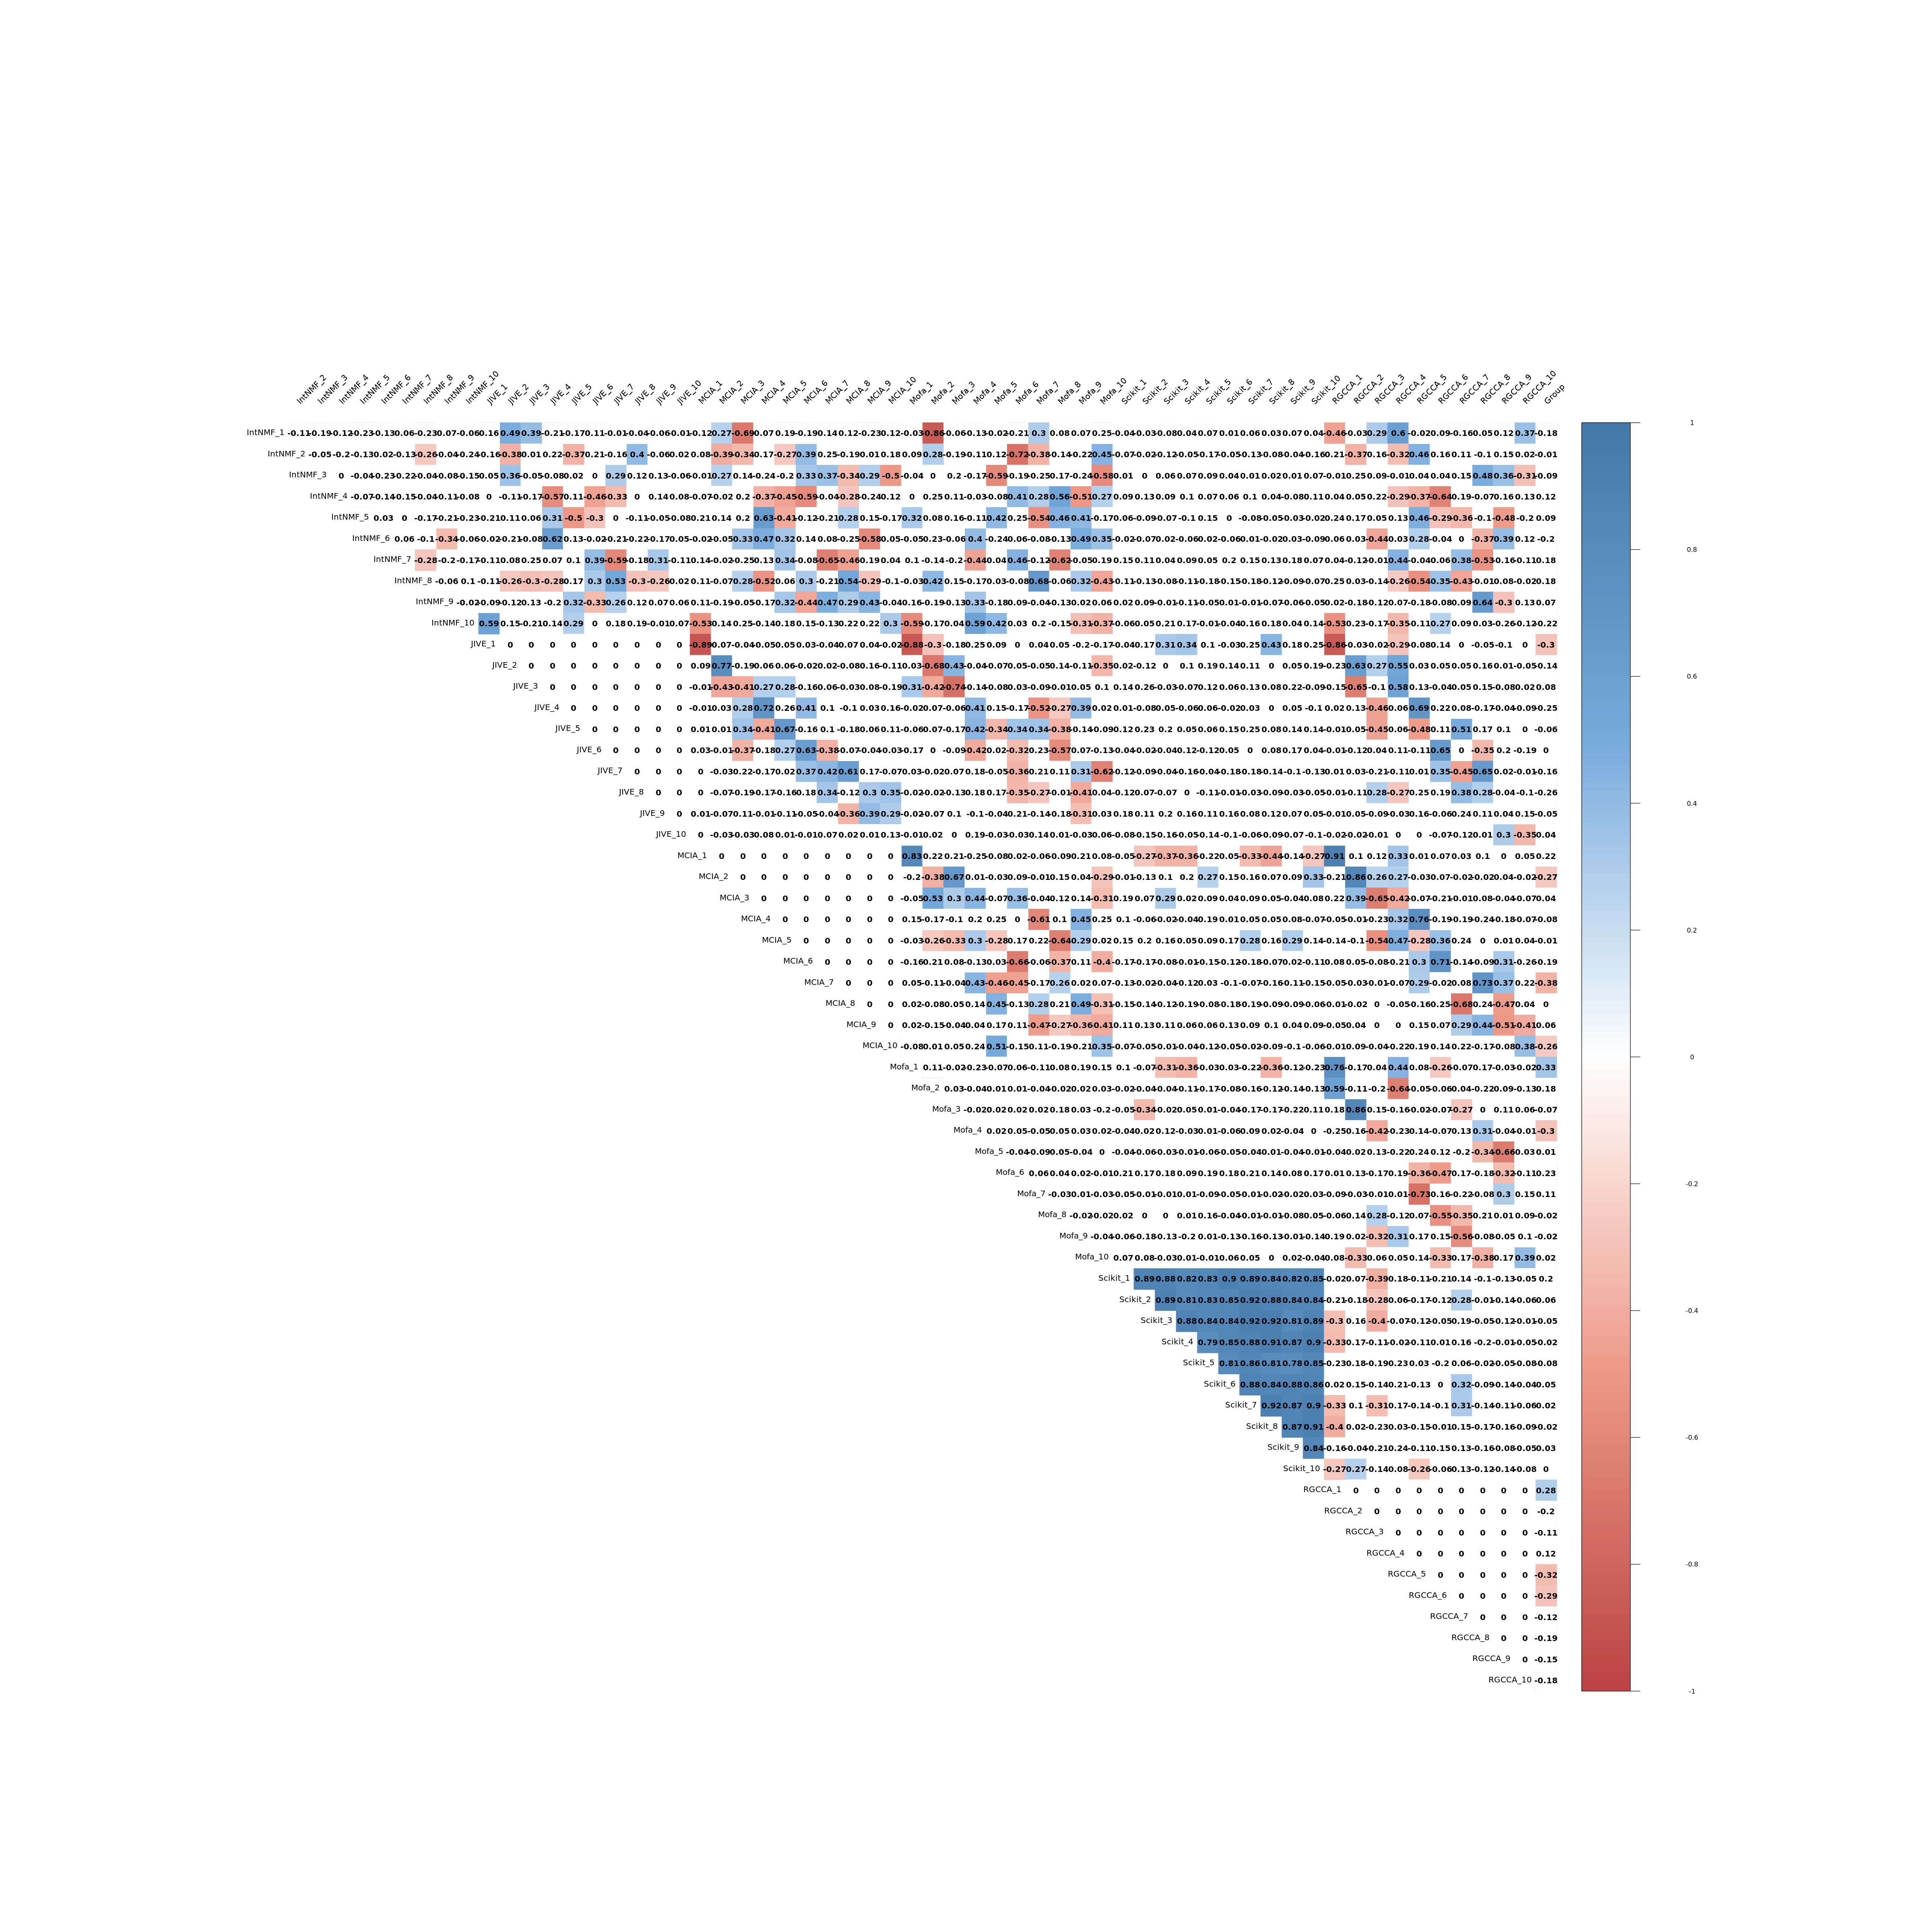